### MNIST Digits Classification with NN - Siddhardhan 

#### Libraries

In [1]:
# Importing Libraries
from PIL import Image
import cv2

import torch
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix

# Random Seed
my_seed = 2
torch.manual_seed(my_seed)
np.random.seed(my_seed)

# Cuda Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


#### Data Collection & Processing

In [2]:
# Data Collection
train_set = datasets.MNIST(root='./data', train=True, download=True)
test_set = datasets.MNIST(root='./data', train=False, download=True)

# As Arrays
X_train, y_train = np.asarray(train_set.data), np.asarray(train_set.targets)
X_test, y_test = np.asarray(test_set.data), np.asarray(test_set.targets)

In [3]:
# Datasets Shapes
print('Datsets Shape:')
print(f'{X_train.shape=}'); print(f'{y_train.shape=}'); print(f'{X_test.shape=}'); print(f'{y_test.shape=}')

Datsets Shape:
X_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


Image #25 --> Class: 2


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

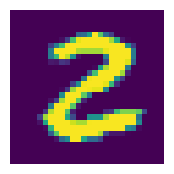

In [4]:
n_img = 25
print(f'Image #{n_img} --> Class: {y_train[n_img]}')
plt.figure(figsize=(2,2)); plt.imshow(X_train[n_img]); plt.axis('off')


##### EDA

In [5]:
# Target Count
y_train_df = pd.DataFrame(y_train, columns=['targets'])
y_train_df.value_counts()

targets
1          6742
7          6265
3          6131
2          5958
9          5949
0          5923
6          5918
8          5851
4          5842
5          5421
Name: count, dtype: int64

In [6]:
# Resize and Scale Images

# In this case, all images alraady are the same size.

# Scaling
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Transform to Tensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train, dtype= torch.long).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

#### Neural Network

In [7]:
# Importing Pytorch

# Torch Seed & Device


In [8]:
# Model Structure, Training Loop Function & Testing Function

# Model Structure

# Training Loop Function

# Testing Function

In [9]:
# [GUÍA - NO MIRAR] Model Structure, Training Loop Function & Testing Function
''' [GUÍA - NO MIRAR] Model Structure, Training Loop Function & Testing Function
class Simple_Neural_Network(torch.nn.Module):
    def __init__(self, input_shape, n_neurons, output_shape):
        super().__init__()
        self.flatten_1 = torch.nn.Flatten()
        self.layer_1 = torch.nn.Linear(input_shape, n_neurons)
        self.relu_1 = torch.nn.ReLU()
        self.layer_2 = torch.nn.Linear(n_neurons, output_shape)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.flatten_1(x)
        x  = self.relu_1(self.layer_1(x))
        x  = self.sigmoid(self.layer_2(x))
        return x

# Training Loop
def train_model(my_model, train_loader, val_loader, criterion, optimizer, epochs=100, patience=10):
    
    # Early Stopping Parameters - Initialization
    best_loss = float('inf')
    trigger_times = 0
    
    # List for Plotting Losses per Epoch
    train_epoch_losses = []
    val_epoch_losses = []

    for epoch in range (epochs):
        
        my_model.train() # Put model in training mode
        epoch_loss = 0      # Total Epoch Loss
        running_loss = 0.0  # Total Running Loss until a given Epoch
        correct = 0
        
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()               # Insert Explanation
            outputs = my_model(x_batch)         # Feed Forward
            loss = criterion(outputs, y_batch)  # Error Calculation
            loss.backward()                     # Backpropagation
            optimizer.step()                    # Update weights
            
            running_loss = running_loss + loss.item()           # Calculate Running Loss until this Epoch
            preds = outputs.argmax(dim=1)                       # Make the predictions for this Batch
            correct = correct + (preds == y_batch).sum().item() # Caclulate Total Correct Predictions in this Epoch
        
        epoch_loss = running_loss / len(train_loader.dataset); train_epoch_losses.append(epoch_loss)
        accuracy = correct / len(train_loader.dataset)
        
        # Validation
        my_model.eval()
        val_epoch_loss = 0 
        val_running_loss = 0
        val_correct = 0
        
        with torch.no_grad():
            for x_val, y_val in val_loader:
                x_val, y_val = x_val.to(device), y_val.to(device)
                val_outputs = my_model(x_val)               # Validation Feed Forward
                val_loss = criterion(val_outputs, y_val)    # Validation Error Calculation

                val_running_loss = val_running_loss + val_loss.item()   # Validation Running Loss until this Epoch
                val_preds = val_outputs.argmax(dim=1)                  # Make Validaiton Predictions for this Batch
                val_correct = val_correct + (val_preds == y_val).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset); val_epoch_losses.append(val_epoch_loss)
        val_accuracy = val_correct / len(val_loader.dataset)
        
        # User Info				
        if (epoch + 1) % max(1, epochs // 10) == 0:
                print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Acc: {accuracy:.4f}, Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Early Stopping & Saving Best Model
        if (epoch_loss <= best_loss):
                best_loss = epoch_loss
                trigger_times = 0
                torch.save(my_model.state_dict(), f'best_model_breast_cancer.pth')
        else:
            trigger_times += 1
            if (trigger_times >= patience):
                print(f'Early stopping at epoch {epoch+1}')
                break
    my_model.load_state_dict(torch.load(f'best_model_breast_cancer.pth'))

    # Plotting
    plt.figure()
    plt.plot(train_epoch_losses, label='Train Loss')
    plt.plot(val_epoch_losses, label='Val Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

def test_model(my_model, test_loader, criterion):
    my_model.eval()
      
    test_running_loss = 0
    test_correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:           
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = my_model(x_batch)
            loss = criterion(outputs, y_batch)
            test_running_loss = test_running_loss + loss.item()
            test_preds = outputs.argmax(dim=1)
            test_correct = test_correct + (test_preds == y_batch).sum().item()
    
        avg_test_loss = test_running_loss / len(test_loader.dataset)
        test_accuracy = test_correct / len(test_loader.dataset)

        all_preds.extend(test_preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

        cm = confusion_matrix(all_labels, all_preds)
        ConfusionMatrixDisplay(cm).plot()

        print(f"\n🧪 Test Loss: {avg_test_loss:.4f}")
        print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")'''          
    

' [GUÍA - NO MIRAR] Model Structure, Training Loop Function & Testing Function\nclass Simple_Neural_Network(torch.nn.Module):\n    def __init__(self, input_shape, n_neurons, output_shape):\n        super().__init__()\n        self.flatten_1 = torch.nn.Flatten()\n        self.layer_1 = torch.nn.Linear(input_shape, n_neurons)\n        self.relu_1 = torch.nn.ReLU()\n        self.layer_2 = torch.nn.Linear(n_neurons, output_shape)\n        self.sigmoid = torch.nn.Sigmoid()\n\n    def forward(self, x):\n        x = self.flatten_1(x)\n        x  = self.relu_1(self.layer_1(x))\n        x  = self.sigmoid(self.layer_2(x))\n        return x\n\n# Training Loop\ndef train_model(my_model, train_loader, val_loader, criterion, optimizer, epochs=100, patience=10):\n    \n    # Early Stopping Parameters - Initialization\n    best_loss = float(\'inf\')\n    trigger_times = 0\n    \n    # List for Plotting Losses per Epoch\n    train_epoch_losses = []\n    val_epoch_losses = []\n\n    for epoch in range (

In [10]:
# Hyperparameters & Training Inputs

# Hyperparameters

# Create X and y as Tensors

# Create Tensor Datasets (train, validation, test)

# Dataloaders for Batches (train, validation, test)


In [11]:
# Creating the Neural Network (Model, Criterion and Optimizer)

# Train Model


In [12]:
# Test Model